# Word embeddings

__Word embeddings__: Representaciones vectoriales densas de una longitud predefinida, donde podemos inferir propiedades semánticas de las palabras, tales como su significado, mediante la semántica distribucional. Para obtenerlos, se usa un __modelo de lenguaje__. Los modelos que asignan __probabilidades__ a __secuencias de palabras__ se les llaman modelos de lenguaje. Introducir probabilidades nos permite inferir características semánticas de las palabras, tales como el **significado**, al observar la distribución de las palabras alrededor de alguna de interés.

La idea detrás del concepto de *words embeddings* consiste en asignar a cada palabra dentro del vocabulario un vector real que represente distintos aspectos (vector de características). Estos vectores de características se emplean para expresar la función de probabilidad conjunta de las secuencias de palabras, de manera que en los modelos de lenguaje neuronal se aprende simultáneamente los vectores de características de las palabras y los parámetros de la función probabilidad.

Dado un vocabulario $V$, la probabilidad conjunta se modela (y se aprende) mediante $P(w_t|w_1^{t-1})=f(w_t,\ldots,w_{t-n+1})$. Consta de dos partes:
1. Un mapeo $E(i)$ para cualquier elemento $i$ de $V$ a un vector $E(i)=\mathbf{e} \in \mathbb{R}^d$. Este mapeo es representado por la matriz $\mathbf{E}_{d \times |V|}$ (en el paper de Bengio se representa por $C_{d \times |V|}$).
2. Una función de probabilidad obtenida mediante una función $g(\cdot)$:
    \begin{align*}
      f(i, w_{t-1},\ldots,w_{t-n+1})=g(i,E(w_{t-1}),\ldots,E(w_{t-n+1})).
    \end{align*}

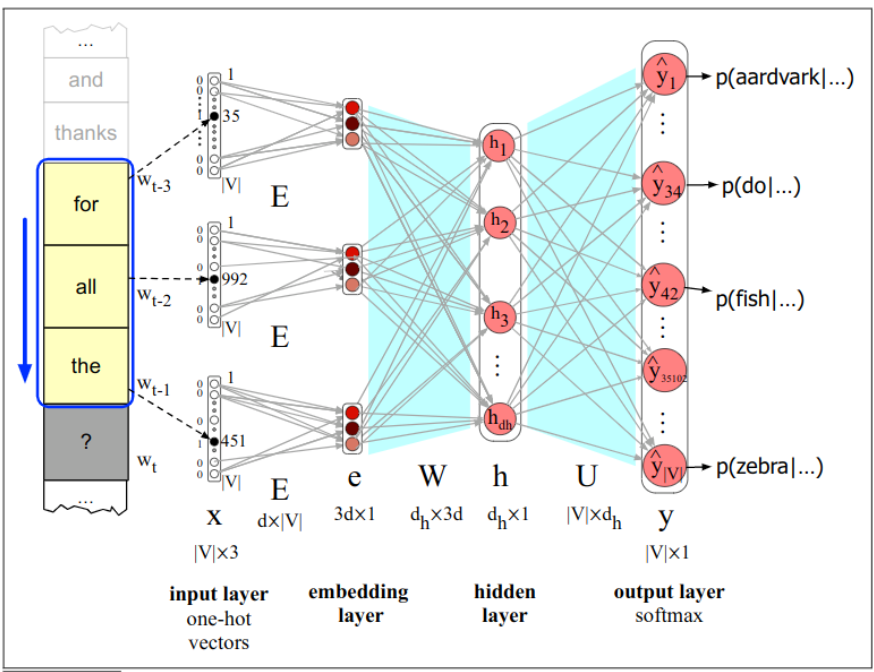

El modelo conocido como *Transformer* ha logrado ser una base fundamental en el campo del procesamiento del lenguaje natural debido a sus mecanismos de atención que consisten en una operación que pondera los valores de una secuencia de entrada, lo que permite al modelo enfocarse en la información relevante o relacionada. Además, esta arquitectura cuenta con una estructura *encoder-decoder* introduce el concepto de atención *multi-head*, enfoque que permite que el modelo aprenda diferentes representaciones de atención, lo cual se puede efectuar de forma paralela, aumentando la capacidad para capturar diferentes relaciones semánticas y de manera más eficiente.

En particular, los *embeddings* producidos por la arquitectura de *Bidirectional Encoder Representations from Transformers* (BERT) han sido muy populares por su capacidad de generar representaciones vectoriales contextuales. BERT es un modelo de representación de lenguaje compuesto por una arquitectura multicapa bidireccional de *Transformer* utilizando como entradas una secuencia de *tokens* construidos usando *WordPiece embeddings*.

## Aplicación de técnicas de procesamiento de lenguaje natural

**EL primar paso en este estudio se basó en cargar la base de datos para crear nuestro corpus.**

In [ ]:
db.head(5)

titular  \
0  Según un informe, Indonesia lanzará un exchang...   
1  Un tribunal iraní ordena la liberación de los ...   
2  ¿El año de la fusión de las mineras de Bitcoin...   
3  El regulador de valores israelí establece un m...   
4  Un analista de Bitcoin identifica nuevos nivel...   

                                             noticia  \
0  Como parte de su reforma de la regulación de l...   
1  Las autoridades iraníes confiscaron numerosos ...   
2  Tras un año impactante para Bitcoin ( BTC ), l...   
3  La Autoridad de Valores de Israel (ISA) propon...   
4  Bitcoin ( BTC ) continuó trabajando para rompe...   

                                             Resumen  \
0  Indonesia creará su propia "criptobolsa" en 20...   
1  Los analistas de Hash Rate Index predicen que ...   
2  La Autoridad de Valores de Israel propone un m...   
3  Bitcoin continúa trabajando para romper la mar...   
4  Binance ha sido el claro "ganador" del mercado...   

                                          Pregunta 1  \
0          ¿Qué reforma financiera planea Indonesia?   
1  ¿Cuál es la estrategia que seguirán los minero...   
2  ¿Cuál es el propósito de la propuesta de regul...   
3   ¿Por qué podría Bitcoin alcanzar los USD 17,000?   
4  ¿Cuál es el dominio del mercado de Binance en ...   

                                         Respuesta 1  \
0  Indonesia planea reformar su régimen de cripto...   
1  Los mineros de Bitcoin se centrarán en fortale...   
2  El propósito de la propuesta es lograr el "dob...   
3  Bitcoin podría alcanzar los USD 17,000 gracias...   
4  Binance ha capturado el 92% del mercado al con...   

                                          Pregunta 2  \
0     ¿Cuándo se creará la criptobolsa de Indonesia?   
1  ¿Qué consecuencias podría tener la estrategia ...   
2  ¿Por qué la autoridad propone modificar la def...   
3  ¿Qué podría dar al precio de BTC el catalizado...   
4  ¿Cómo ha aumentado el dominio del mercado de B...   

                                         Respuesta 2  \
0  Se espera que la criptobolsa se ponga en march...   
1  Los mineros de Bitcoin podrían privatizarse o ...   
2  La autoridad propone modificar la definición d...   
3  La publicación del índice de precios al consum...   
4  El dominio del mercado de Binance ha aumentado...   

                                          Pregunta 3  \
0  ¿Quién supervisará las criptomonedas en Indone...   
1  ¿Qué riesgos cubrirán los mineros de Bitcoin e...   
2  ¿Qué requisitos se establecen para los emisore...   
3  ¿Qué niveles de soporte proporcionan a los alc...   
4        ¿Cuál es la predicción de Arcane para 2023?   

                                         Respuesta 3  \
0  La supervisión de las criptomonedas pasará de ...   
1  Los mineros de Bitcoin cubrirán riesgos utiliz...   
2  Se establece el requisito de que los emisores ...   
3  Sólidos niveles de soporte proporcionan a los ...   
4  Arcane predice que Binance volverá a implement...   

                                          Pregunta 4  ...  \
0  ¿Cuándo entrará en vigor el impuesto sobre las...  ...   
1  ¿Cuándo se espera que termine el actual mercad...  ...   
2  ¿Qué medidas se toman para proteger al inverso...  ...   
3  ¿Cuándo podría llegar el fondo del mercado de ...  ...   
4  ¿Binance podría estar sujeta a un mayor escrut...  ...   

                                          Pregunta 6  \
0  ¿Ha habido algún proyecto de criptomoneda en I...   
1  ¿Por qué se ha producido una crisis en la indu...   
2  ¿Qué recomendó la economista jefe de Israel so...   
3  ¿Qué nivel de resistencia se encuentra entre 1...   
4  ¿Por qué podrían ser importantes las regulacio...   

                                         Respuesta 6 Toxico Clasificacion  \
0  En diciembre de 2021, el gobernador del Banco ...      0       Neutral   
1  La crisis en la industria de la minería de cri...      0      Neutral.   
2  La economista jefe de Israel recomendó un marc...      0       Neutral   


## Análisis exploratorio

**Iniciamos contando la longitud de los títulos de las noticias**

(array([  26.,  219.,  820., 1427., 1287.,  789.,  329.,   78.,   21.,
           4.]),
 array([ 4. ,  6.9,  9.8, 12.7, 15.6, 18.5, 21.4, 24.3, 27.2, 30.1, 33. ]),
 <BarContainer object of 10 artists>)

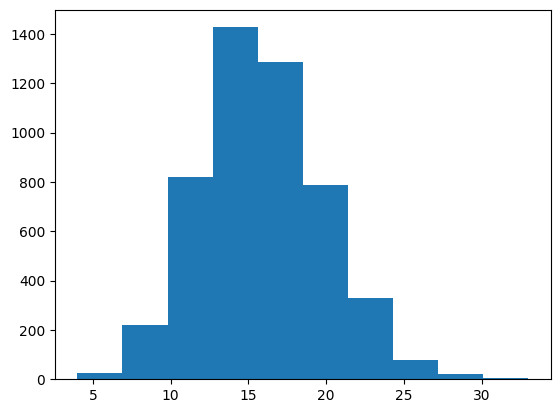

In [ ]:
plt.hist(n_titulo)

**Después, se contó el número de palabras en el resumen de las noticias.**

(array([  18.,  423., 1396., 1713.,  953.,  356.,  116.,   20.,    2.,
           3.]),
 array([  3. ,  19.3,  35.6,  51.9,  68.2,  84.5, 100.8, 117.1, 133.4,
        149.7, 166. ]),
 <BarContainer object of 10 artists>)

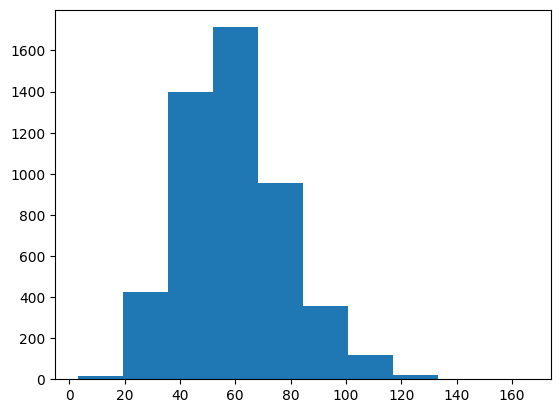

In [ ]:
plt.hist(n_resum)

**Por último, se realizó un conteo del número de palabras en el texto de la noticia.**

(array([  21.,    9.,   24.,   93.,  280.,  455.,  871., 1211., 1138.,
         898.]),
 array([ 77. , 144.8, 212.6, 280.4, 348.2, 416. , 483.8, 551.6, 619.4,
        687.2, 755. ]),
 <BarContainer object of 10 artists>)

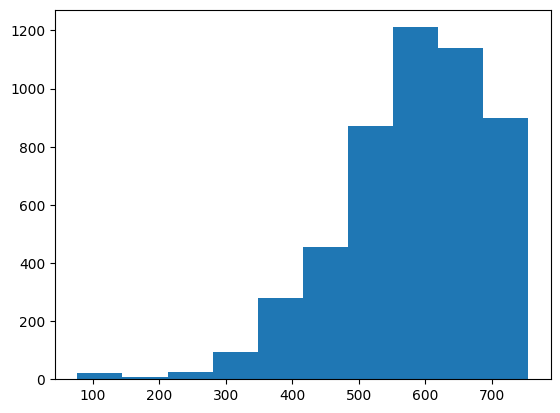

In [ ]:
plt.hist(n_not)

## ***Preprocesamiento***

**Una vez relizado el análsis exploratorio, se realizó un preprocesamiento de cada una de los textos de los blogs para limpiar un poco el texto y además se aplicó lematización.**

Para realizar los análisis posteriores se procesaron las noticias de los registros para eliminar guiones bajos que unen ciertos pares de palabras consecutivas en nuestro corpus, eliminar ciertos caracteres inservibles y se realizó el proceso de lematización. Posteriormente, para cada texto de noticia se separó el texto por palabra para ser guardado en una lista.

### ***Nube de puntos***

(-0.5, 899.5, 399.5, -0.5)

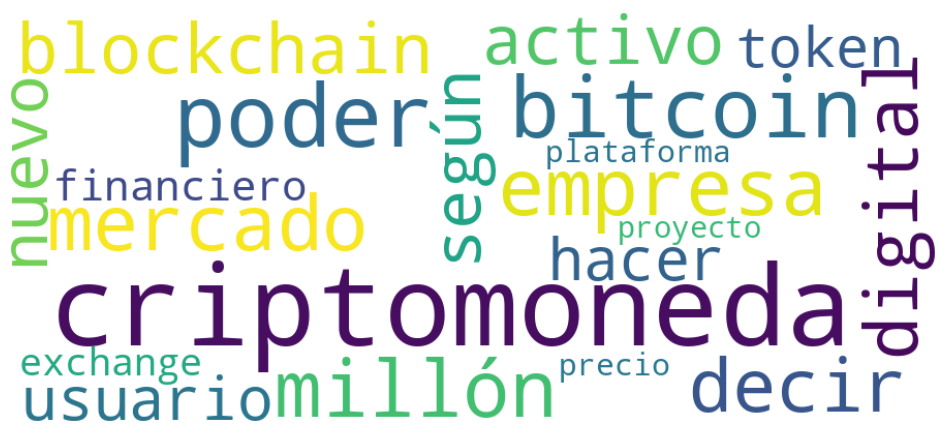

In [ ]:
#Nube de puntos del cuerpo de noticias

Al realizar la nube de palabras observamos que palabras como criptomoneda, blockchain, bitcoin, mercado y empresa.

## BOW

In [11]:
#Se aplica la metodologia de bolsa de palabras
max_words = 10000
vectorizer = CountVectorizer(lowercase=True, ngram_range= (1,1), max_features=max_words, binary=False)
X = vectorizer.fit_transform(token_text)
bow = X.toarray()
bow_df = pd.DataFrame(bow,columns=vectorizer.get_feature_names_out())
bow_df

aar  aave  abajo  abandonar  abanico  abarcar  abiertamente  abierto  \
0       0     0      0          0        0        0             0        0   
1       0     0      0          0        0        0             0        0   
2       0     0      0          0        0        0             0        0   
3       0     0      0          0        0        0             0        0   
4       0     0      0          0        0        0             0        0   
...   ...   ...    ...        ...      ...      ...           ...      ...   
4995    0     0      0          0        0        0             0        0   
4996    0     0      0          0        0        0             0        0   
4997    0     0      0          0        0        0             0        0   
4998    0     0      0          1        0        0             0        0   
4999    0     0      0          0        0        0             0        0   

      abismo  able  ...  óptimo  órden  órgano  últimamente  último  únetar  \
0          0     0  ...       0      0       0            0       0       0   
1          0     0  ...       0      0       0            0       1       0   
2          0     0  ...       0      0       0            0       0       0   
3          0     0  ...       0      0       0            0       2       0   
4          0     0  ...       0      0       0            0       0       0   
...      ...   ...  ...     ...    ...     ...          ...     ...     ...   
4995       0     0  ...       0      0       0            0       0       0   
4996       0     0  ...       0      0       0            0       0       0   
4997       0     0  ...       0      0       0            0       0       0   
4998       0     0  ...       0      0       0            0       0       0   
4999       0     0  ...       0      0       0            0       0       0   

      únetir  únicamente  único  útil  
0          0           0      0     0  
1          0           0      0     0  
2          0           0      1     0  
3          0           0      1     0  
4          0           0      0     0  
...      ...         ...    ...   ...  
4995       0           0      0     0  
4996       0           0      0     0  
4997       0           0      0     0  
4998       0           0      0     0  
4999       0           1      0     0  

[5000 rows x 10000 columns]

**PCA**

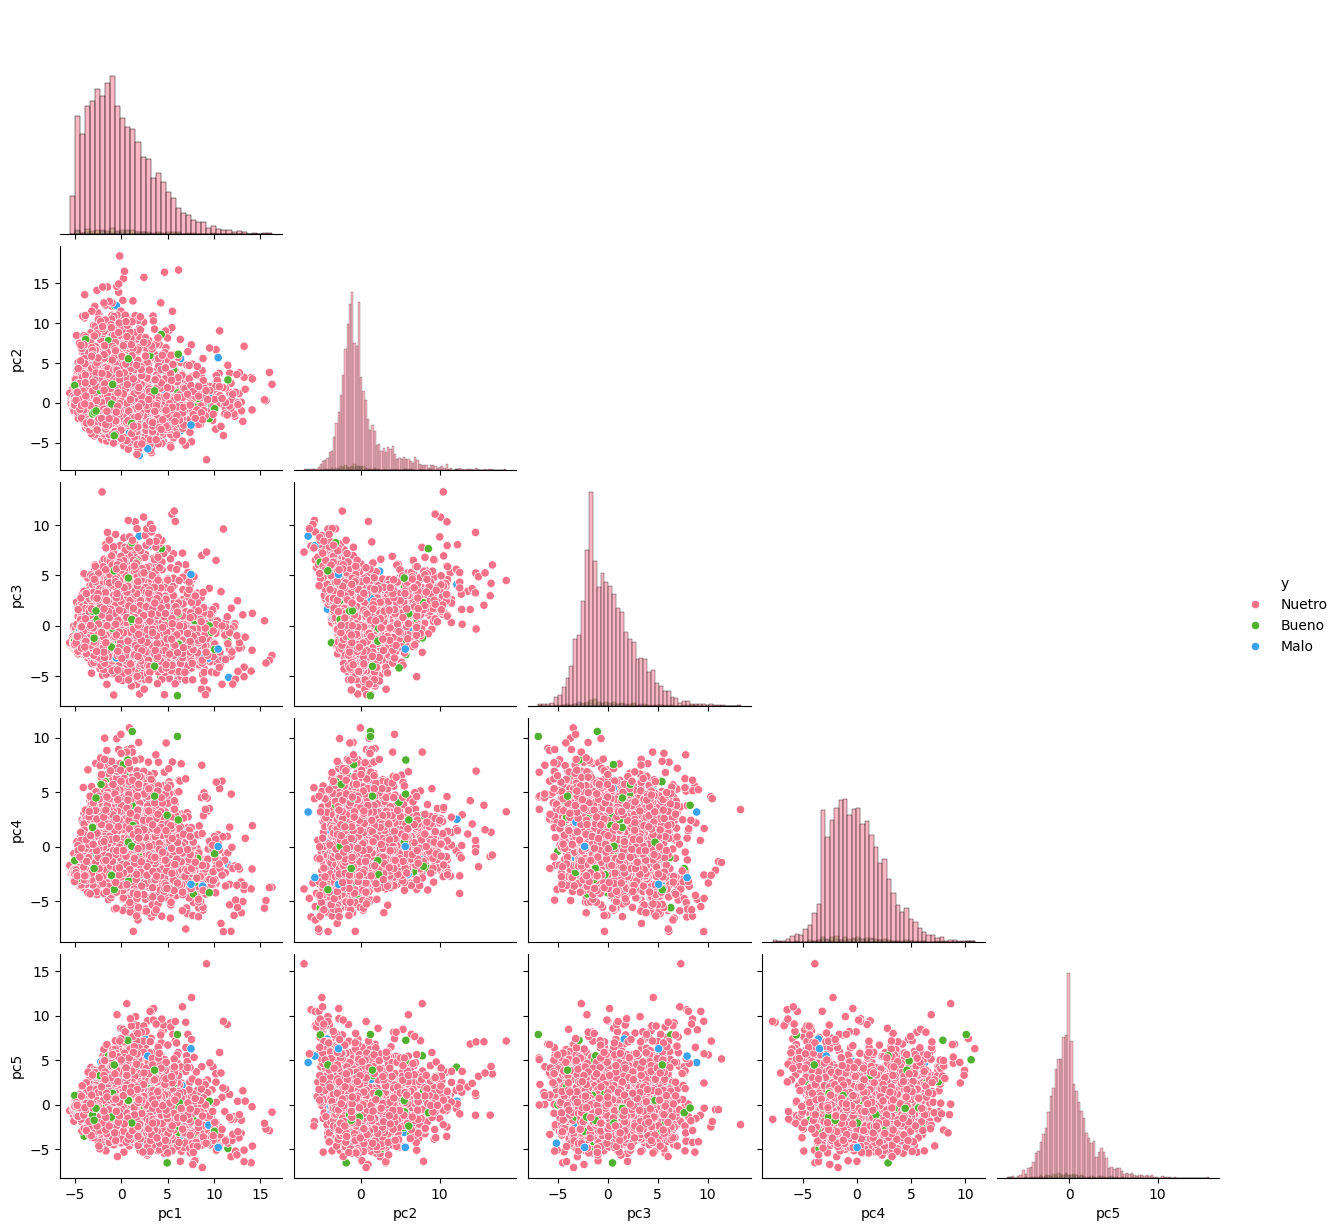

**Locally Linear Embedding**

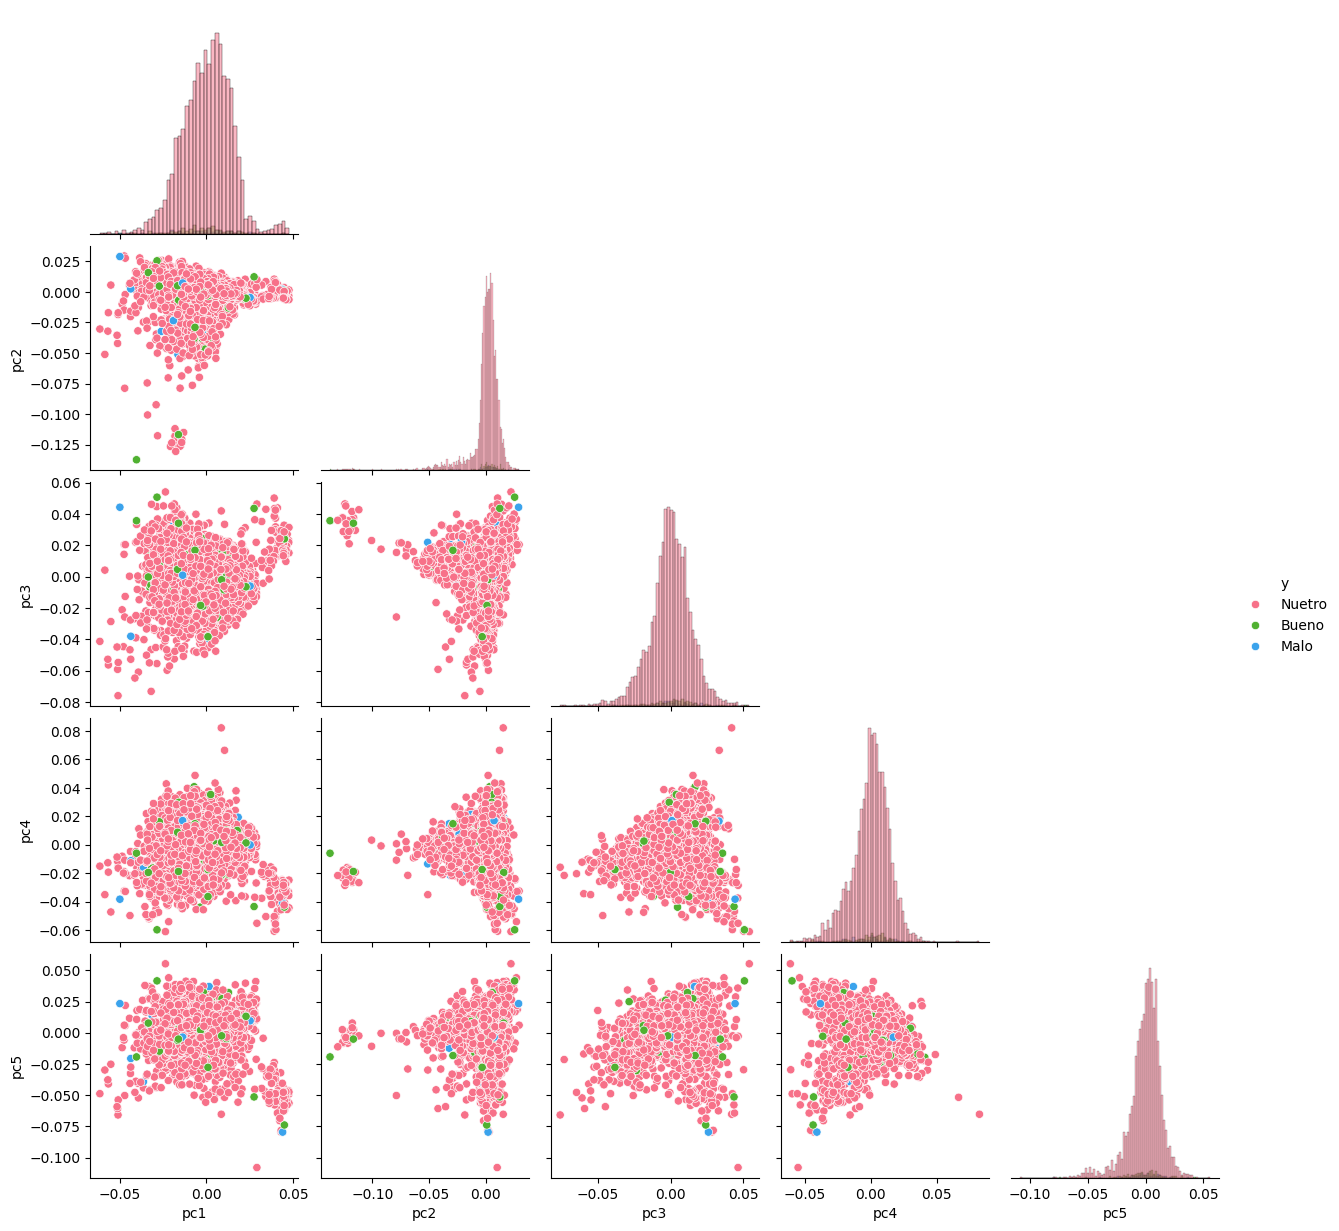

## TF-IDF

In [21]:
max_words = 10000
vectorizer = TfidfVectorizer(lowercase=False, ngram_range= (1,1), max_features=max_words)
X = vectorizer.fit_transform(token_text)
tf_idf = X.toarray()
tf_idf_df = pd.DataFrame(tf_idf,columns=vectorizer.get_feature_names_out())
tf_idf_df

aar  aave  abajo  abandonar  abanico  abarcar  abiertamente  abierto  \
0     0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
1     0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
2     0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
3     0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
4     0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
...   ...   ...    ...        ...      ...      ...           ...      ...   
4995  0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
4996  0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
4997  0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   
4998  0.0   0.0    0.0   0.048083      0.0      0.0           0.0      0.0   
4999  0.0   0.0    0.0   0.000000      0.0      0.0           0.0      0.0   

      abismo  able  ...  óptimo  órden  órgano  últimamente    último  únetar  \
0        0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   
1        0.0   0.0  ...     0.0    0.0     0.0          0.0  0.034540     0.0   
2        0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   
3        0.0   0.0  ...     0.0    0.0     0.0          0.0  0.047389     0.0   
4        0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   
...      ...   ...  ...     ...    ...     ...          ...       ...     ...   
4995     0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   
4996     0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   
4997     0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   
4998     0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   
4999     0.0   0.0  ...     0.0    0.0     0.0          0.0  0.000000     0.0   

      únetir  únicamente     único  útil  
0        0.0    0.000000  0.000000   0.0  
1        0.0    0.000000  0.000000   0.0  
2        0.0    0.000000  0.032640   0.0  
3        0.0    0.000000  0.038526   0.0  
4        0.0    0.000000  0.000000   0.0  
...      ...         ...       ...   ...  
4995     0.0    0.000000  0.000000   0.0  
4996     0.0    0.000000  0.000000   0.0  
4997     0.0    0.000000  0.000000   0.0  
4998     0.0    0.000000  0.000000   0.0  
4999     0.0    0.051585  0.000000   0.0  

[5000 rows x 10000 columns]

**PCA**

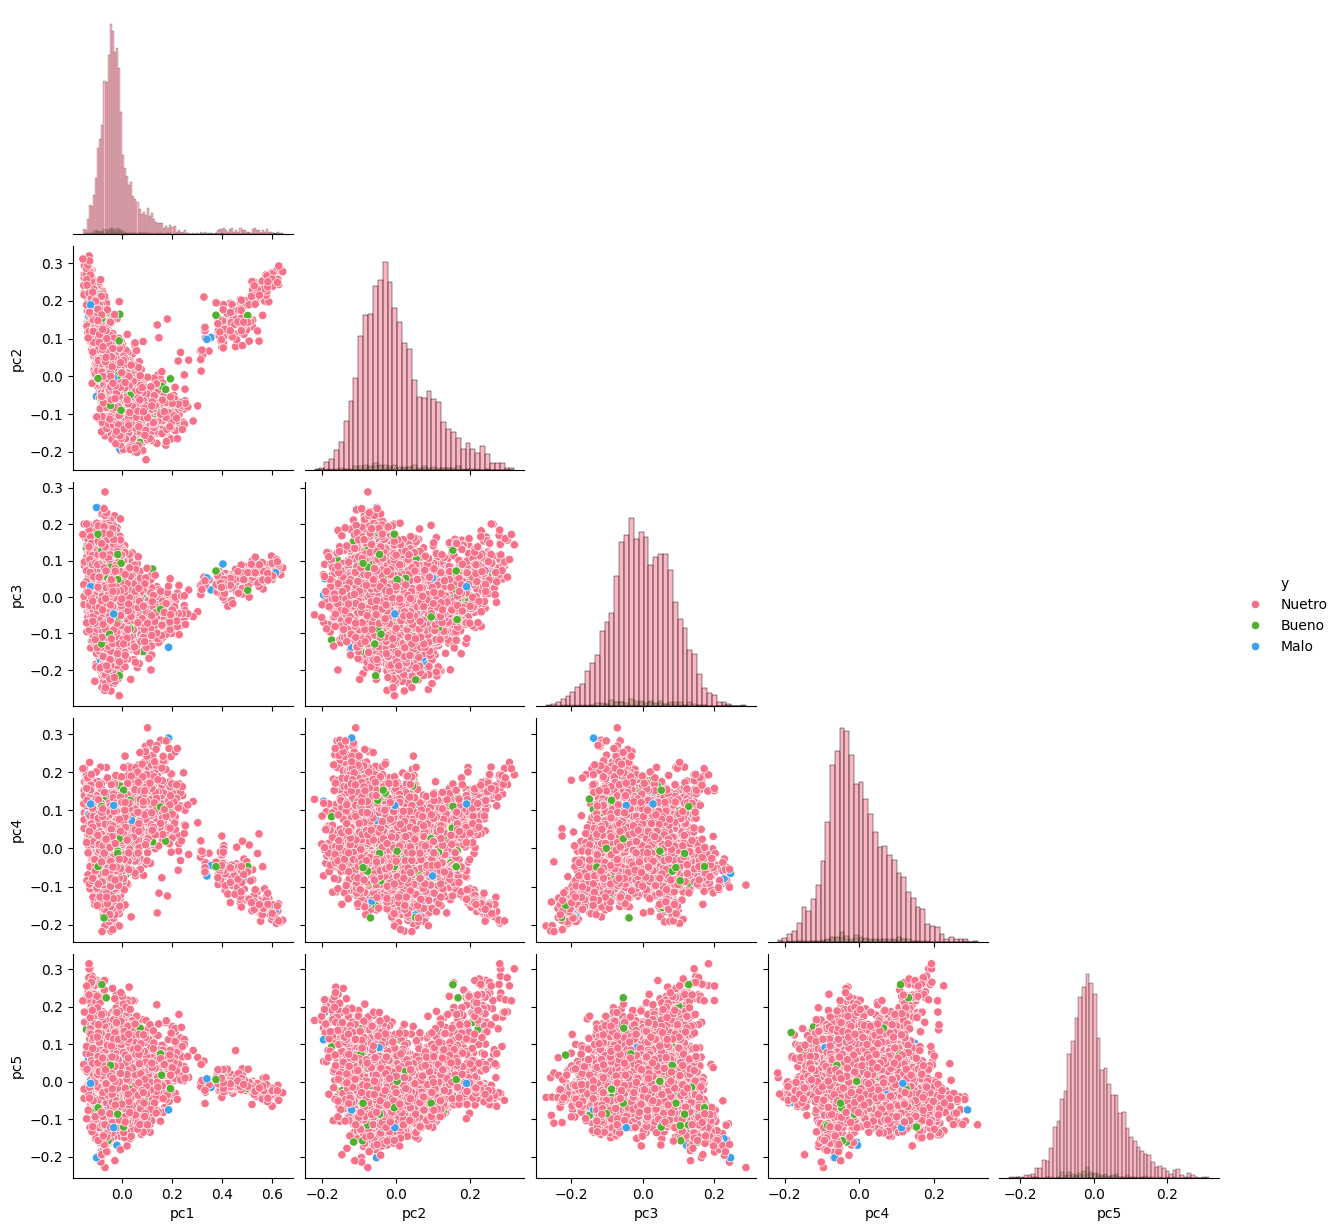

**Kernel PCA**

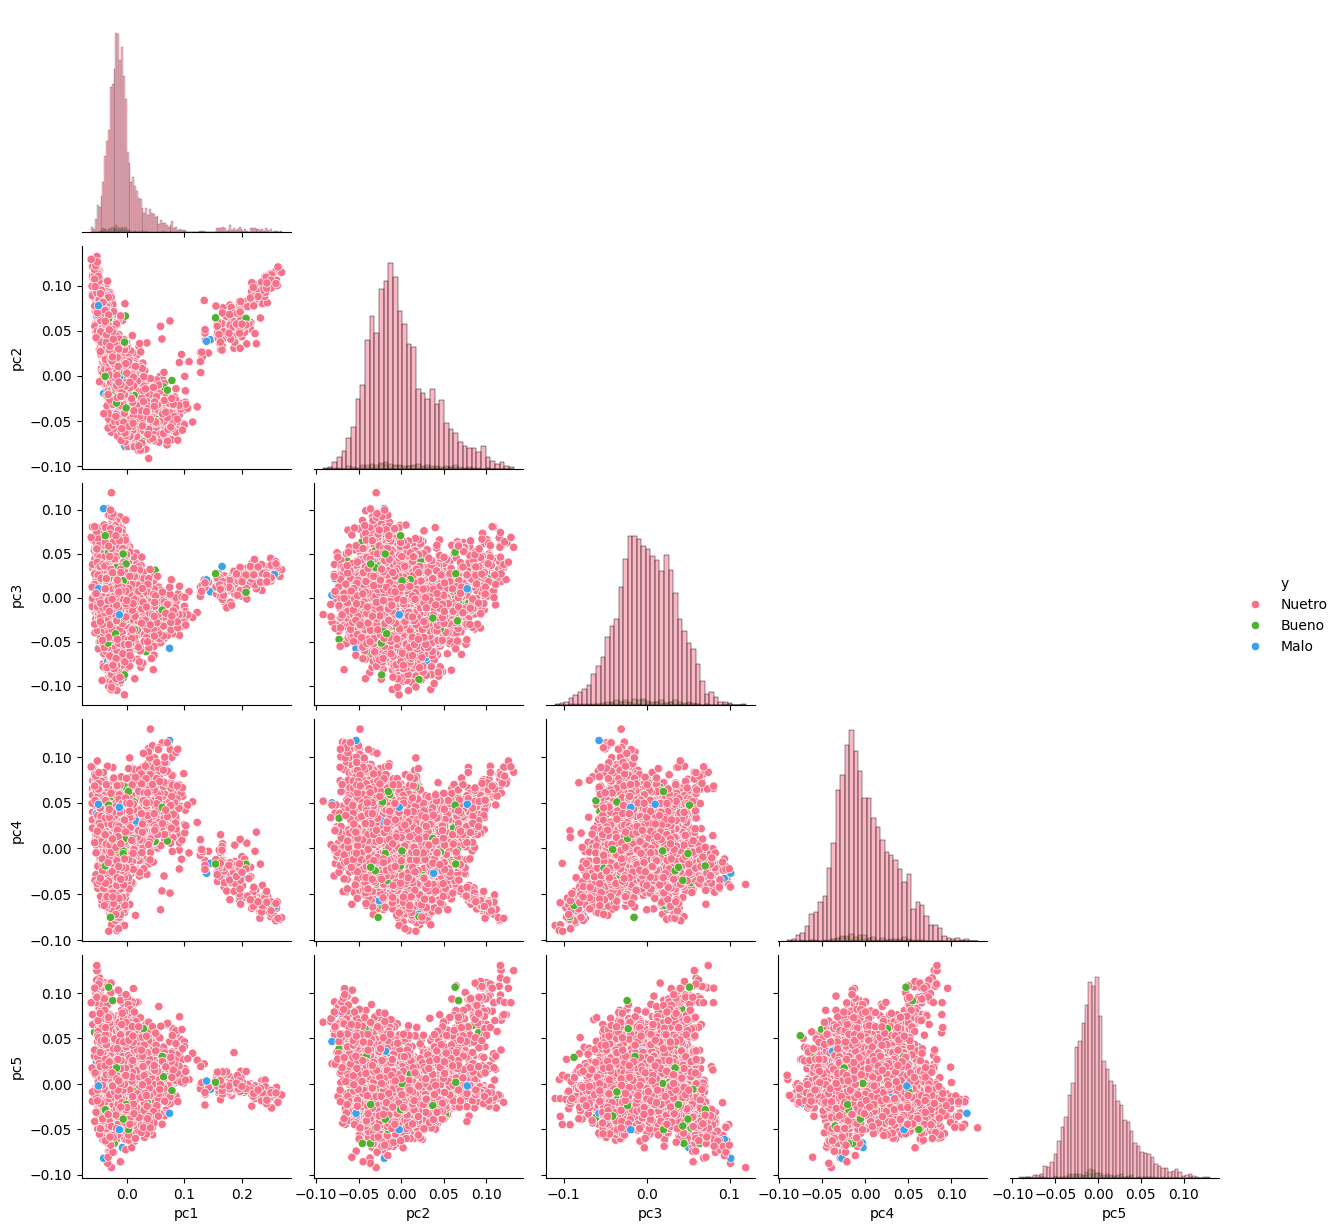

**Locally Linear Embedding**

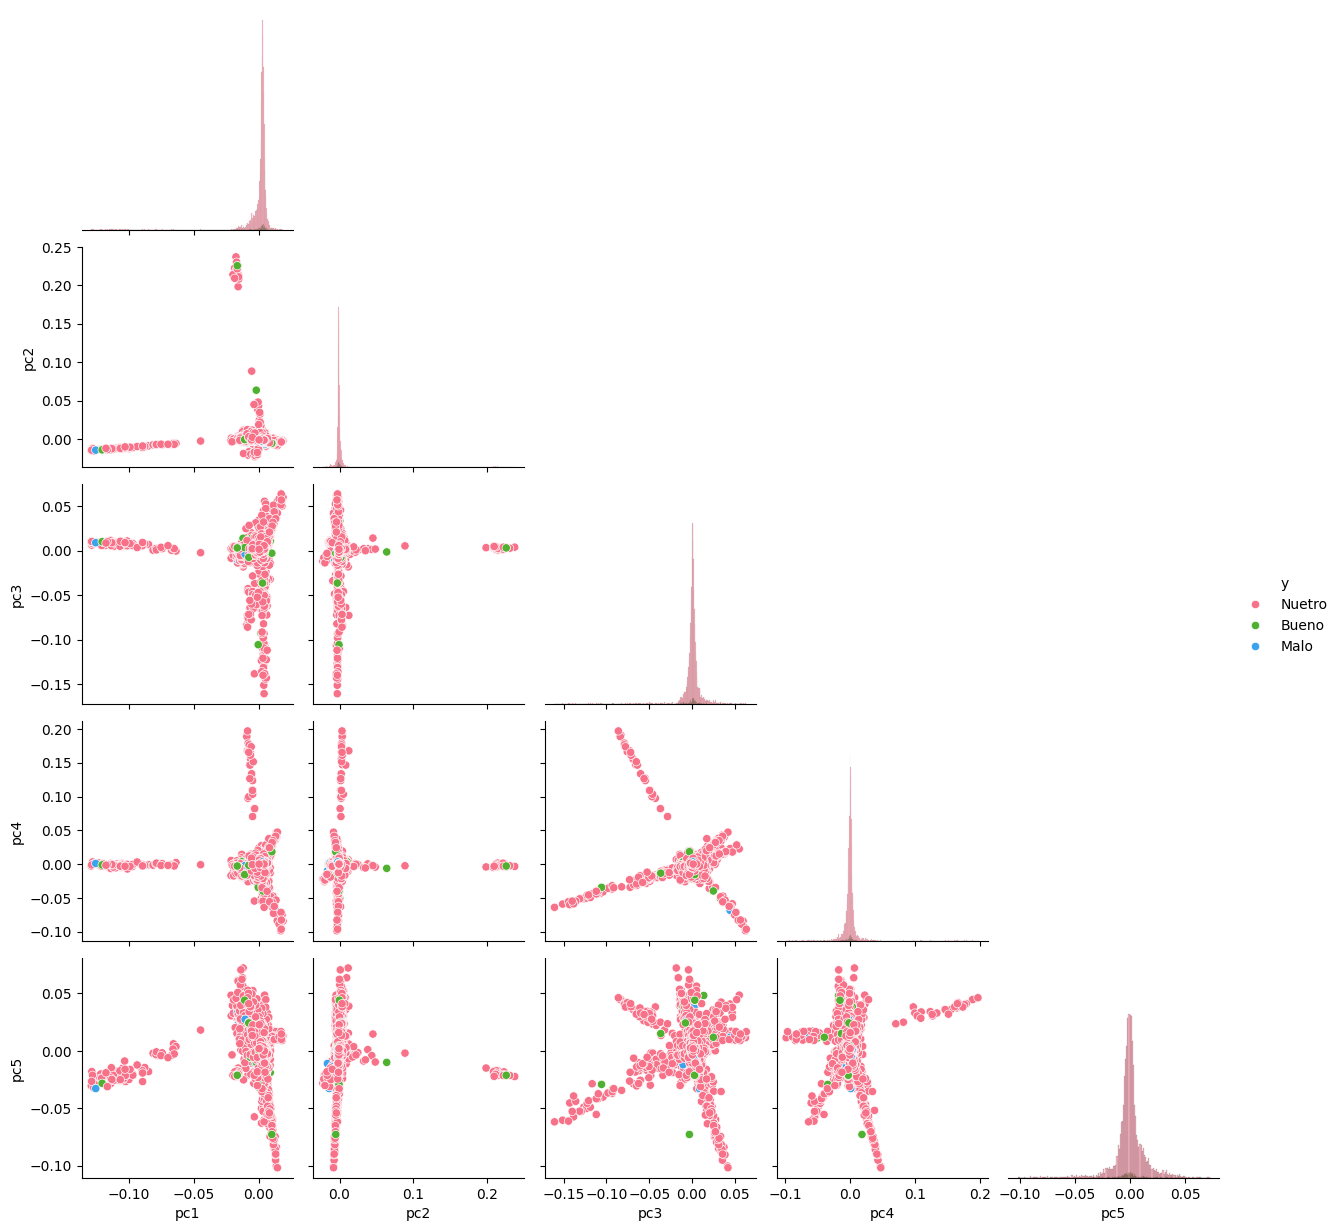

## Fast Test

In [32]:
aux_i = 0
train_embeddings = np.zeros((len(token_text),300))
for sentence in token_text:
  aux_n = 0
  for word in sentence:
    if word in vocab:
      train_embeddings[aux_i] = train_embeddings[aux_i] + embeddings[vocab.lookup_indices([word])]
      aux_n = aux_n + 1
  train_embeddings[aux_i] = train_embeddings[aux_i] /aux_n
  aux_i = aux_i + 1

**PCA**

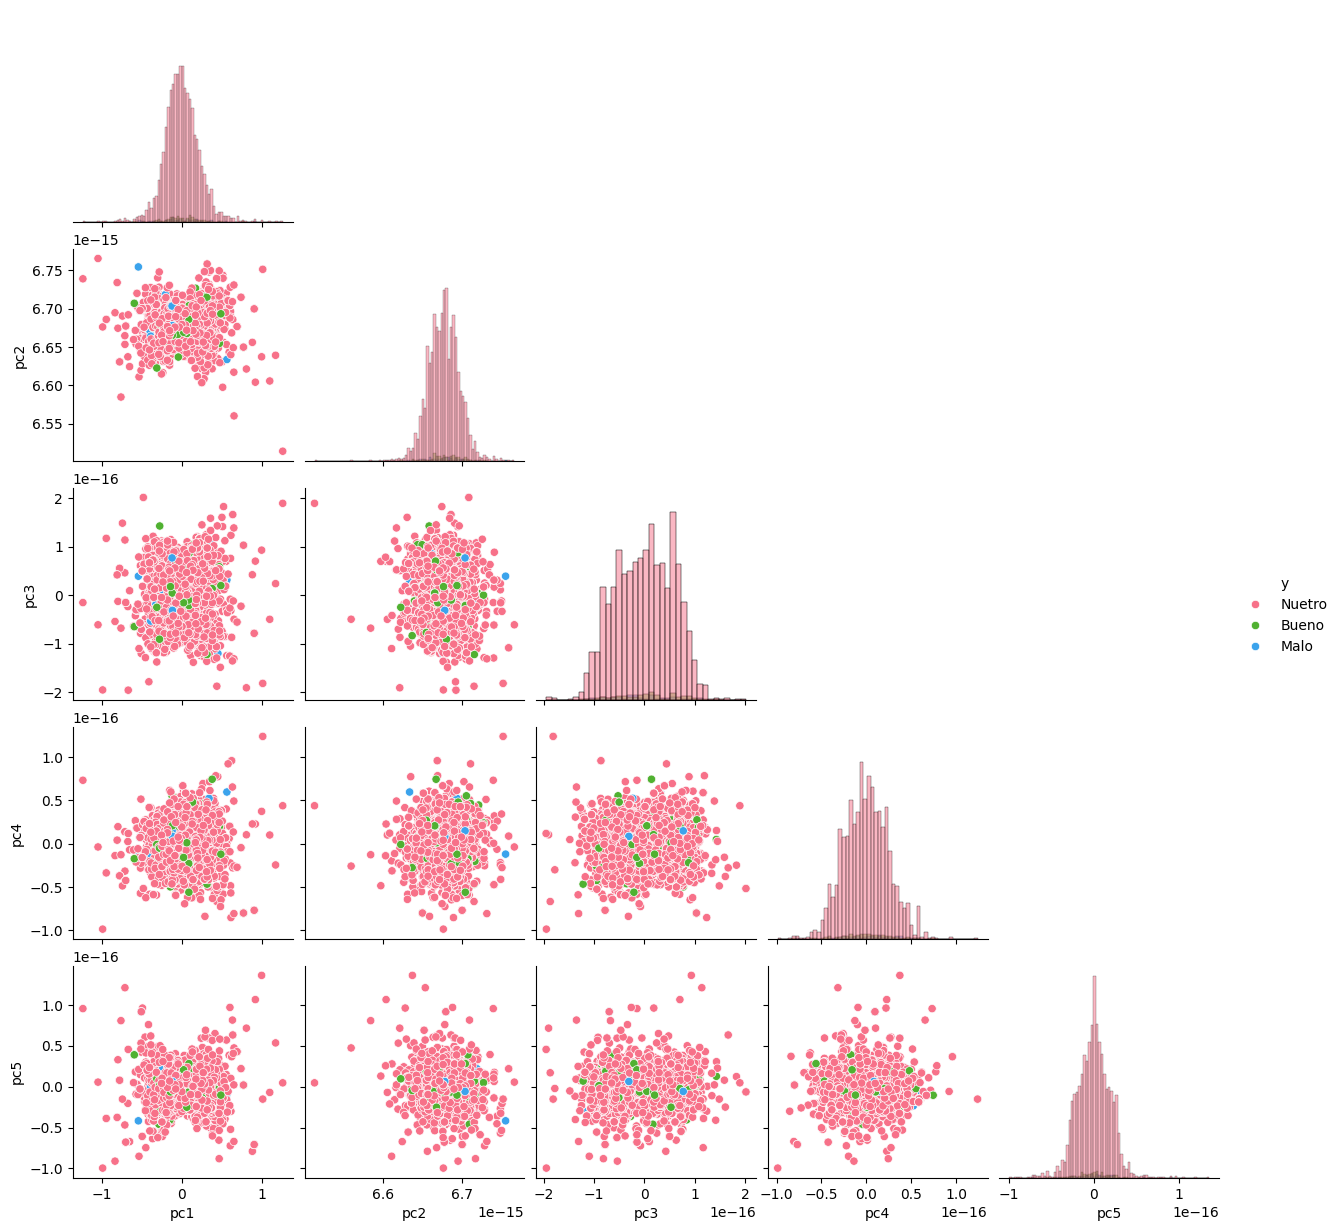

**Kernel PCA**

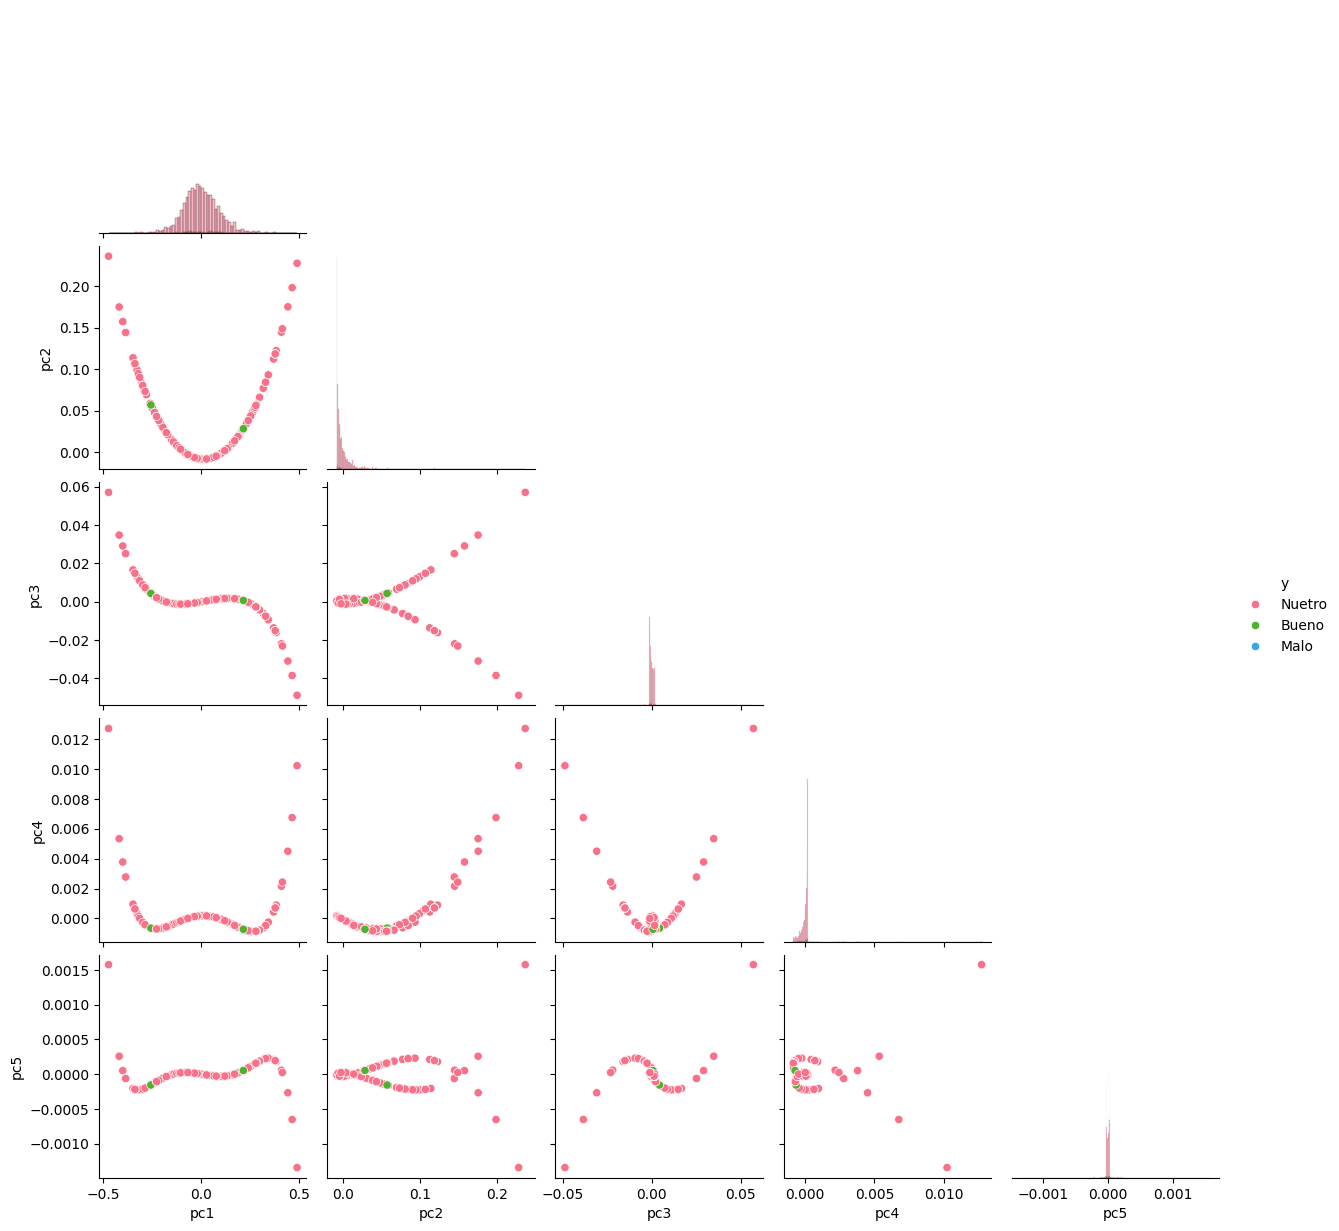

**Locally Linear Embedding**

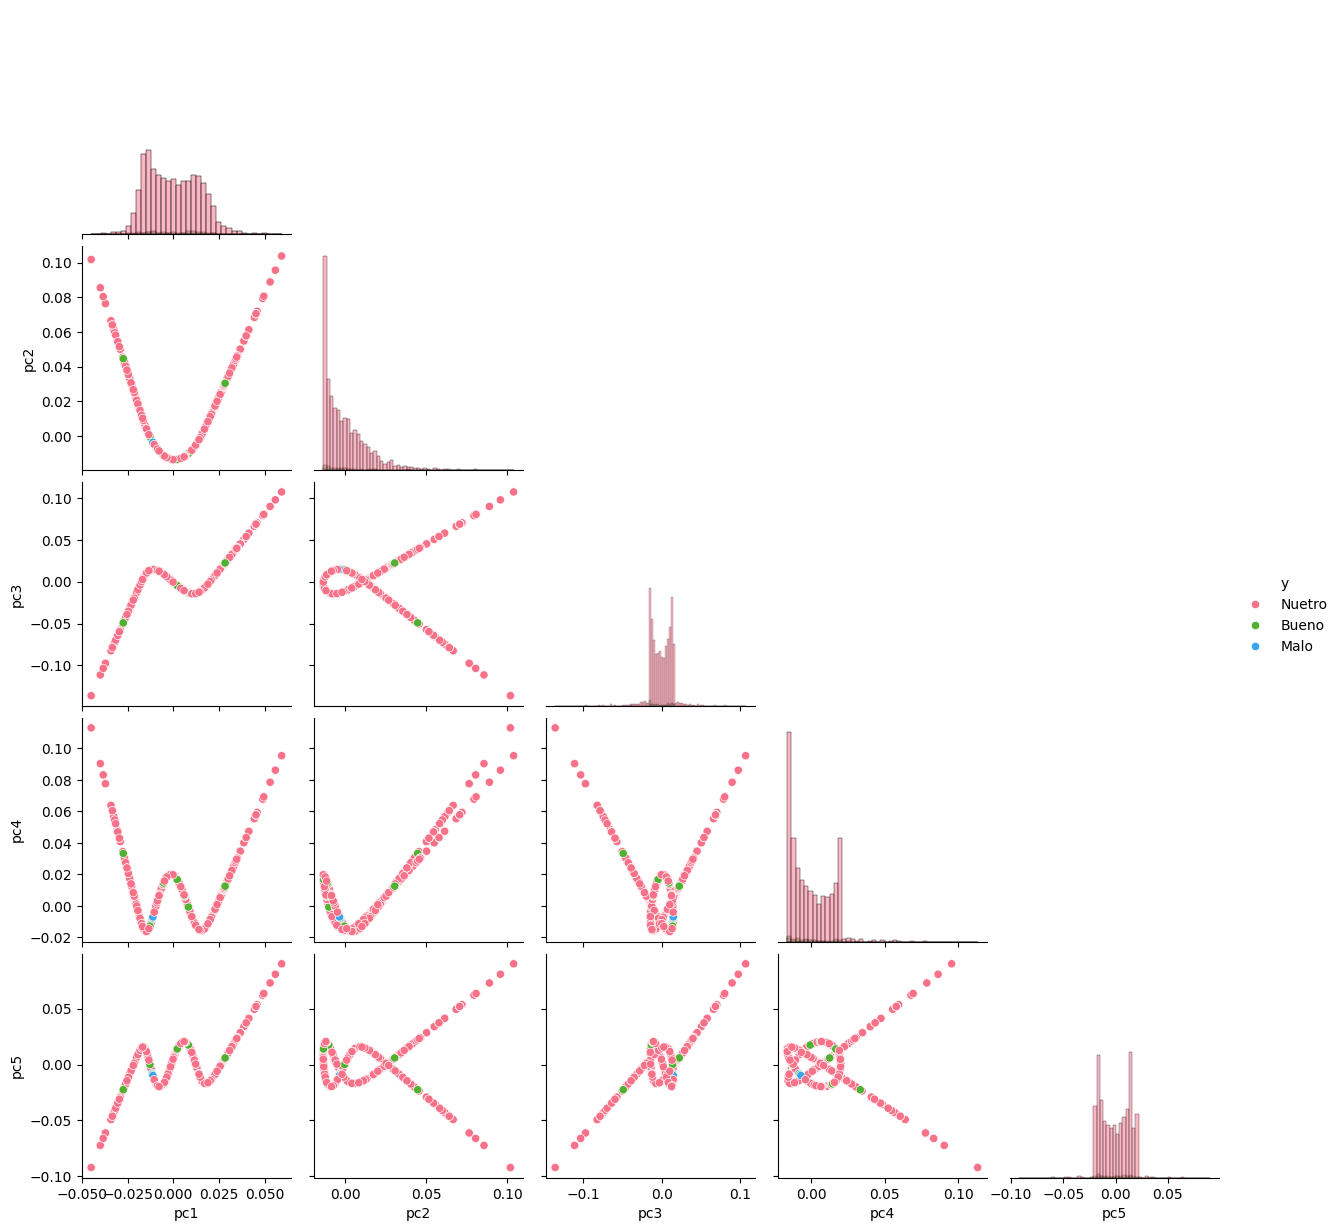

## BERT

In [ ]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'dccuchile/bert-base-spanish-wwm-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

model.to(device)
train_features = np.empty((0,768))
for step, batch in enumerate(train_dataloader):
  b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)
  with torch.no_grad():
    last_hidden_states = model(input_ids = b_input_ids, attention_mask = b_attn_mask)
  train_features = np.concatenate([train_features,last_hidden_states[0][:,0,:].to('cpu').numpy()])

**Kernel PCA**

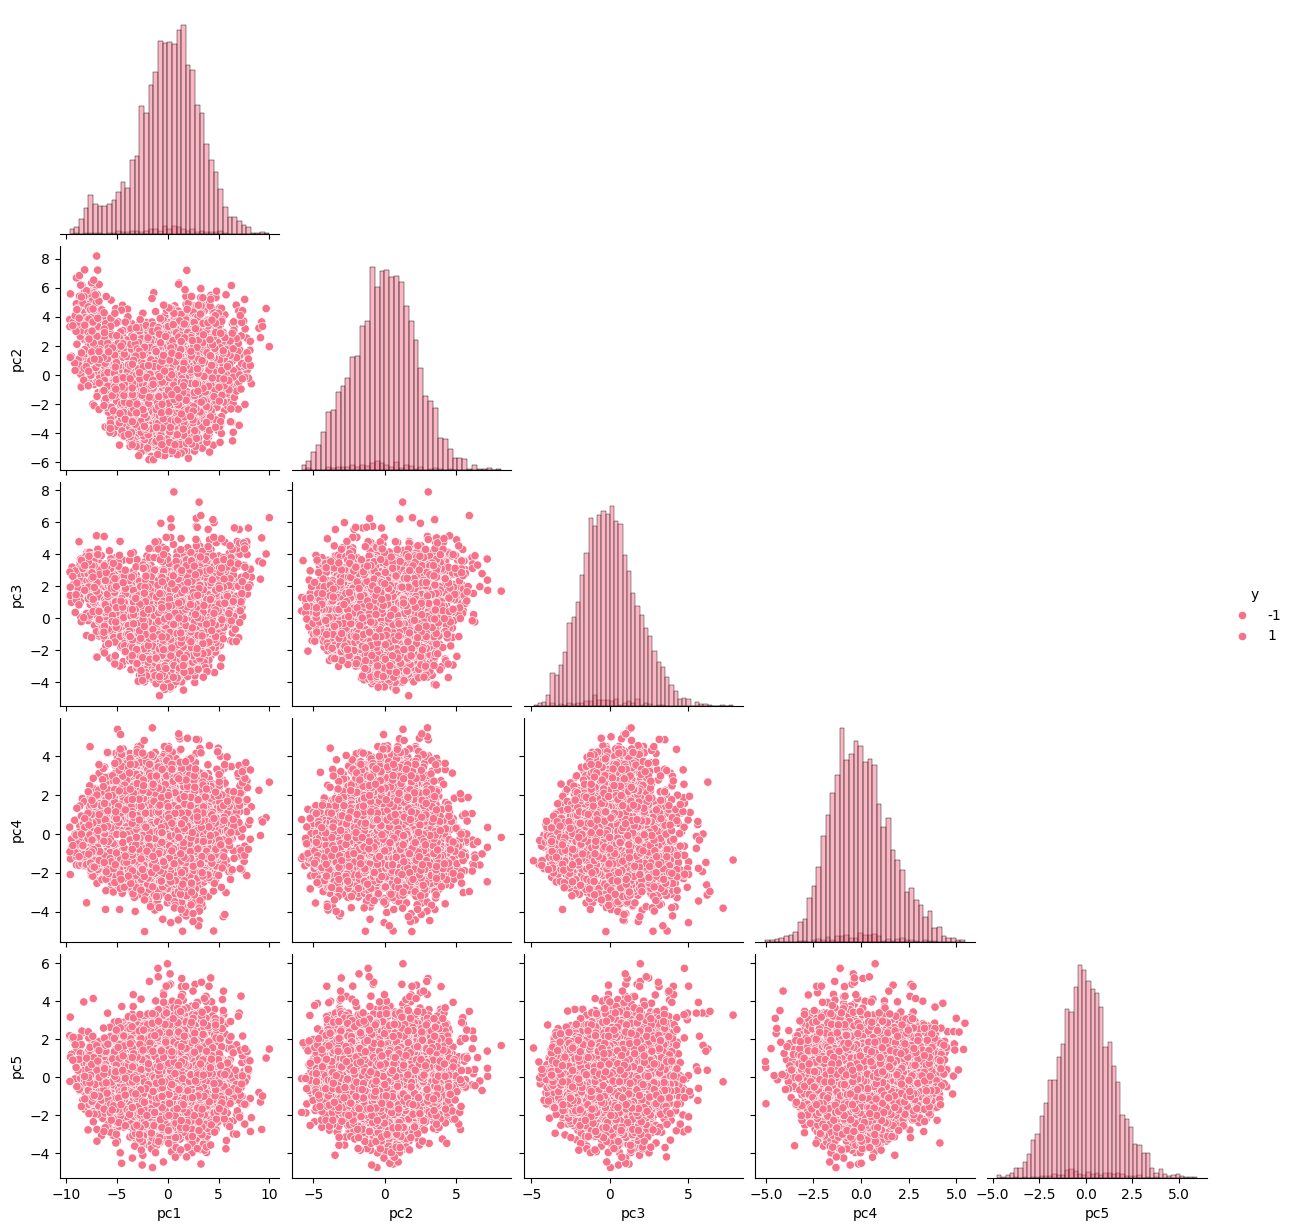

**Kernel PCA**

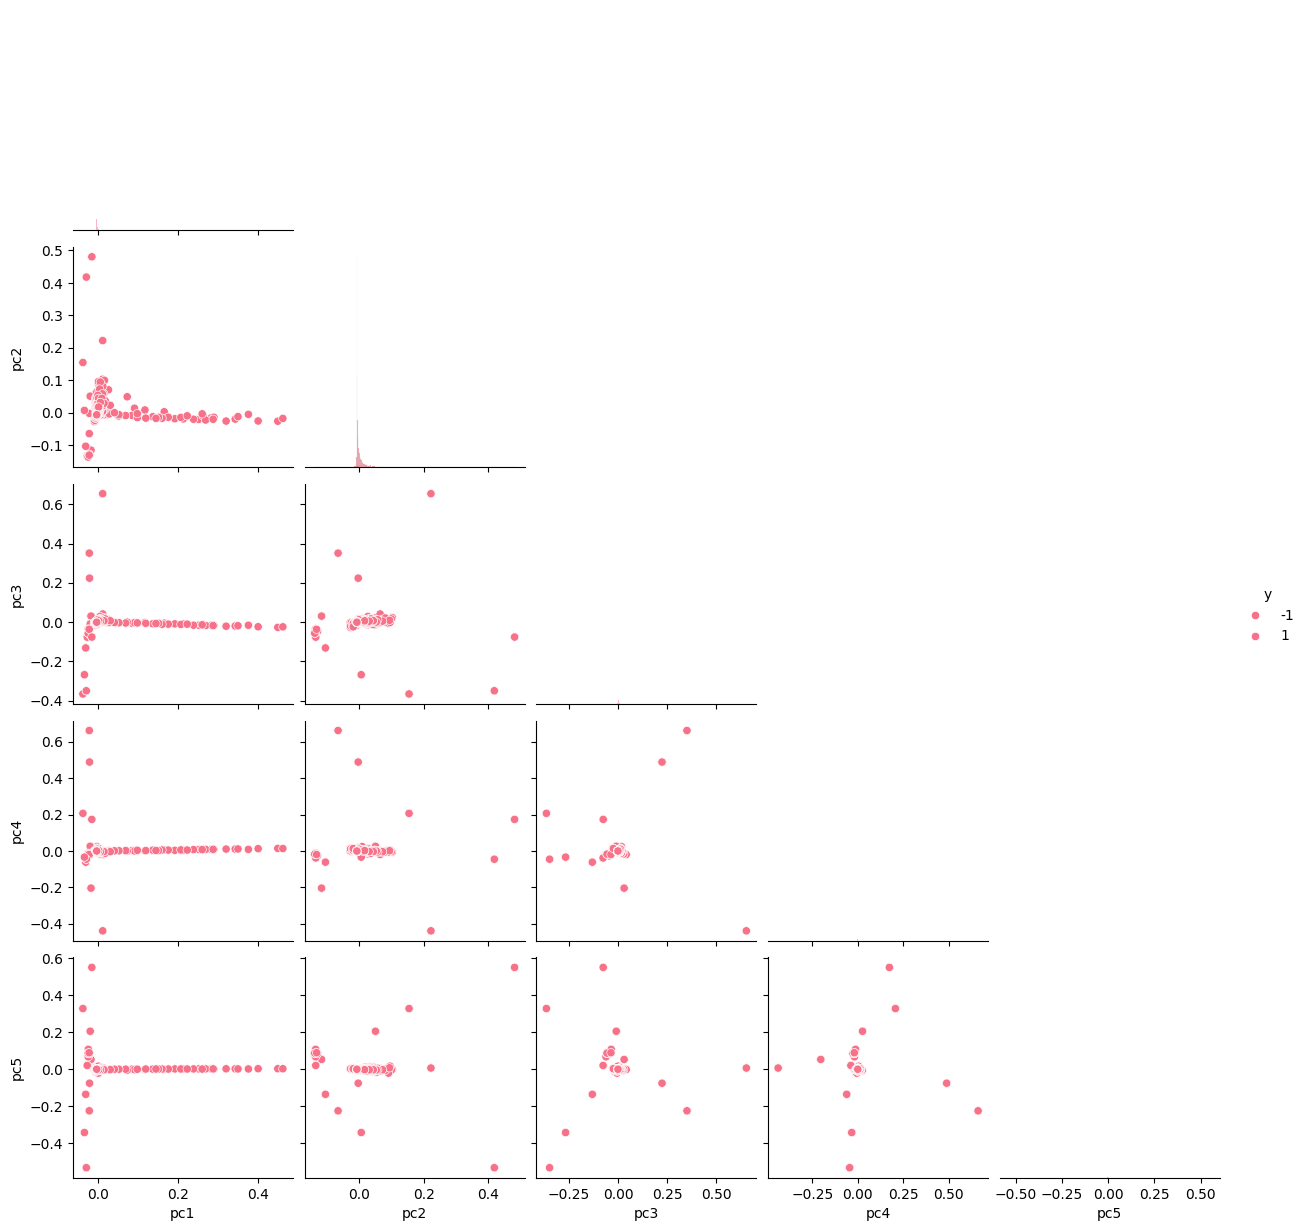

**Locally Linear Embedding**

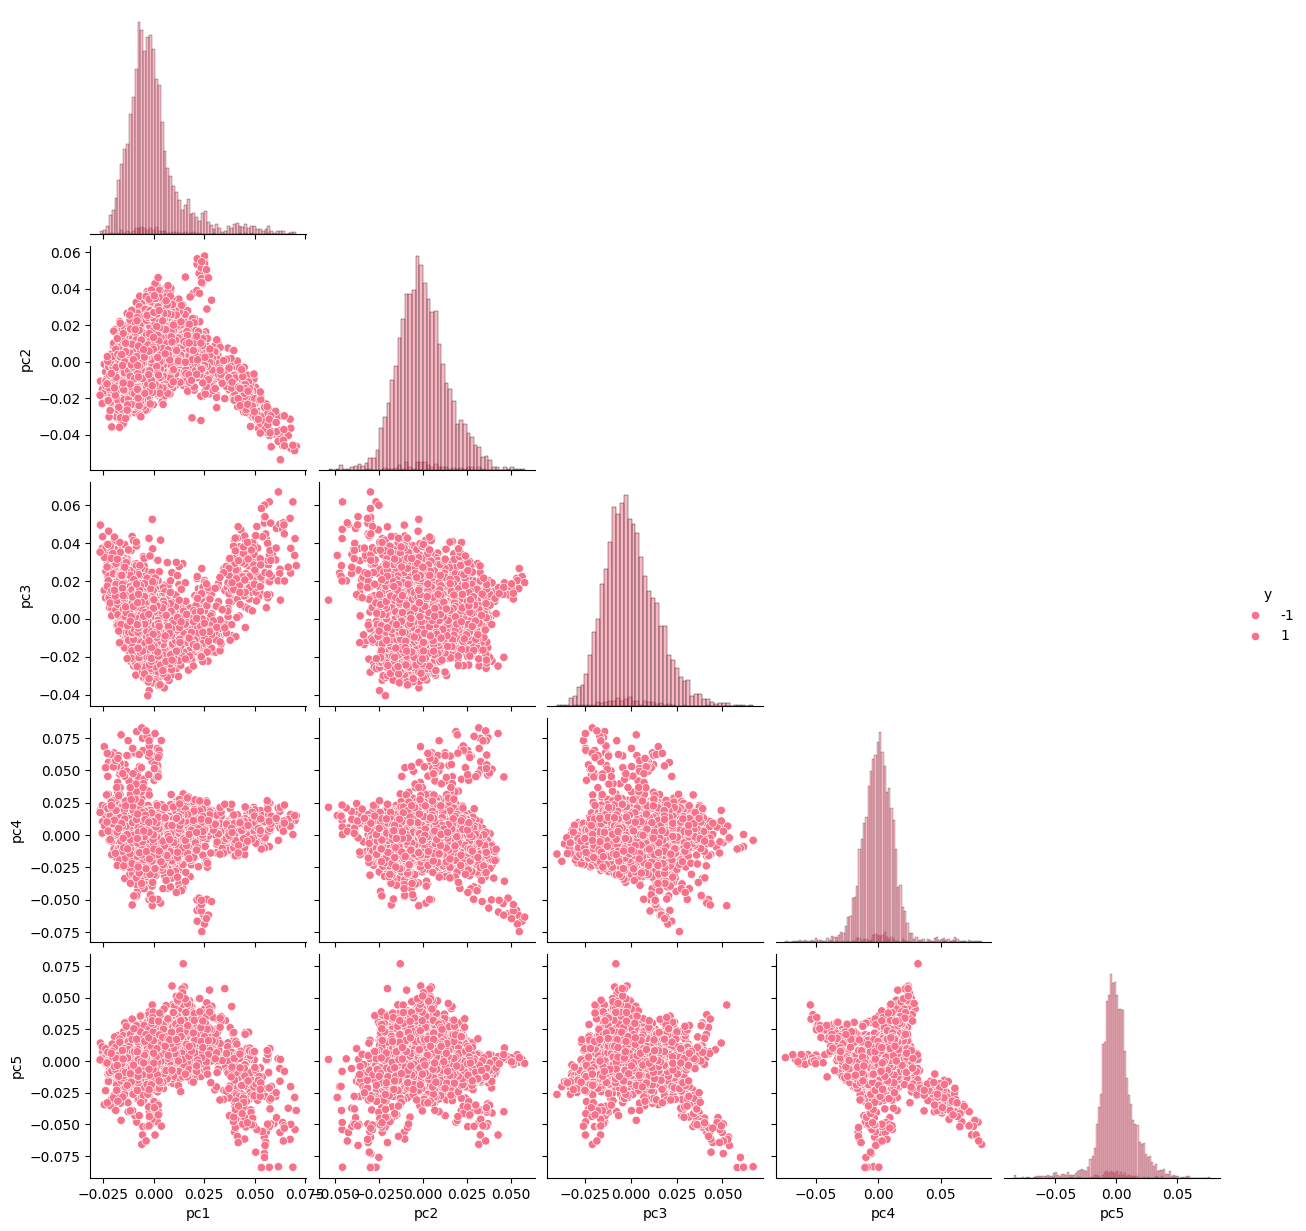